In [3]:
# library
import pandas as pd
from rdkit import Chem
from rdkit import RDLogger
RDLogger.DisableLog('RdApp.*')

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


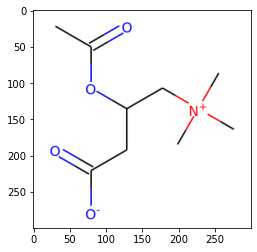

In [4]:
img = Image.open('data/train/train_0.png')
pix = np.array(img)
plt.imshow(pix)

In [13]:
train = pd.read_csv('data/train.csv')
y_smiles = train['SMILES'].values
y_smiles

array(['CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
       'CC(=O)OC(CC(=O)O)C[N+](C)(C)C', 'O=C(O)C1=CC=CC(O)C1O', ...,
       'COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)NCC(C)C)c(Cl)c3n2)cc1',
       'COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)Nc4cccc(Cl)c4)c(Cl)c3n2)cc1',
       'COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)NCc4cccnc4)c(Cl)c3n2)cc1'],
      dtype=object)

In [14]:
# save npy
np.save('data/y_smiles.npy', arr=y_smiles)

# load npy
y_train = np.load('data/y_smiles.npy', allow_pickle='True')
y_train

array(['CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
       'CC(=O)OC(CC(=O)O)C[N+](C)(C)C', 'O=C(O)C1=CC=CC(O)C1O', ...,
       'COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)NCC(C)C)c(Cl)c3n2)cc1',
       'COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)Nc4cccc(Cl)c4)c(Cl)c3n2)cc1',
       'COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)NCc4cccnc4)c(Cl)c3n2)cc1'],
      dtype=object)

In [ ]:
def f(smiles):
    m = Chem.MolFromSmiles(smiles)
    if m != None:
        smiles = Chem.MolToSmiles(m)
    return smiles

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['SMILES'] = submission.apply(lambda x : f(x['SMILES']), axis=1)
submission.to_csv('sample_submission.csv', index=False)